<a href="https://colab.research.google.com/github/VSennaa/ml_otimizacao/blob/main/Vinicios_Rodrigo_Atividade_6_Otimiza%C3%A7%C3%A3o_aulaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Análise Exploratória e Pré-processamento</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Carregando o CSV
url = 'https://raw.githubusercontent.com/VSennaa/ml_defaulters_classifier/refs/heads/main/emp_automovel.csv'
raw_data = pd.read_csv(url)

# Cópia para edição
dados = raw_data.copy()
# Verifica os tipos de dados
print(dados.dtypes)
dados

receita_cliente        float64
anuidade_emprestimo    float64
anos_casa_propria      float64
telefone_trab            int64
avaliacao_cidade       float64
score_1                float64
score_2                float64
score_3                float64
score_social           float64
troca_telefone         float64
inadimplente             int64
dtype: object


,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [ ]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [ ]:
import plotly.express as px
px.histogram(dados, x='receita_cliente', color='inadimplente')

In [ ]:


px.histogram(dados, x='anuidade_emprestimo', color='inadimplente')

In [ ]:
px.box(dados, x='anuidade_emprestimo', color='inadimplente')

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [ ]:
#criar um modelo de arvore

In [ ]:
x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
SEED = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = SEED, stratify = y)

tree_model = DecisionTreeClassifier(max_depth=10,random_state = SEED) # padronizando a instancia do modelo
tree_model.fit(x_treino, y_treino)
tree_model.score(x_teste, y_teste)

0.9094863489125405

### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

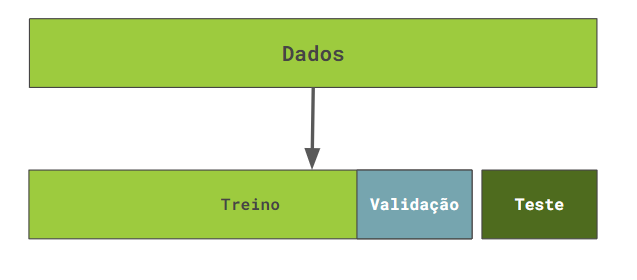

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
SEED = 123
PROFUNDIDADE = 10
# Primeiro: separa teste (20%) e o temp fica o restante para a validacao
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.15, random_state=SEED, stratify=y)

# Segundo: separa validação (20% do total = 25% de x_temp) separa a validacao e oq sobra vira treino (60%)
x_treinoP, x_val, y_treinoP, y_val = train_test_split(x_treino, y_treino, test_size=0.15, random_state=SEED, stratify=y_treino)

tree_model = DecisionTreeClassifier(max_depth=PROFUNDIDADE, random_state=SEED)
modelo = tree_model.fit(x_treinoP, y_treinoP)

In [ ]:
print("Score treino:     ", tree_model.score(x_treino, y_treino))

Score treino:      0.9193179591036781


In [ ]:
print("Score validação:  ", tree_model.score(x_val, y_val))

Score validação:   0.9095659747423429


In [ ]:
print("Score teste:      ", tree_model.score(x_teste, y_teste))

Score teste:       0.907329713721619


### Avaliando o modelo

<p>Uma das maneiras de testar o modelo é como uma matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = modelo.predict(x_val) #Valores "reais"
matrix = confusion_matrix(y_val, y_pred)
matrix

array([[6244,   44],
       [ 579,   22]])

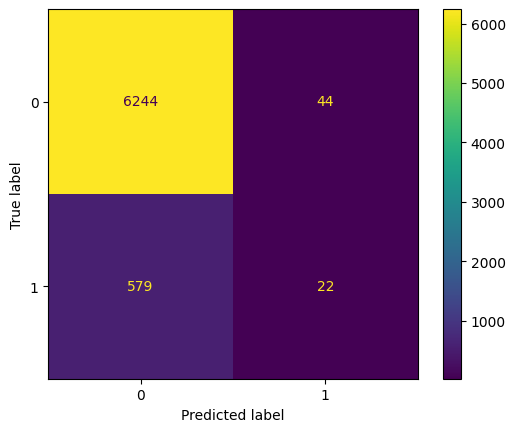

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
grafico_matrix = ConfusionMatrixDisplay(matrix,
                                        display_labels=modelo.classes_)
grafico_matrix.plot()



## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

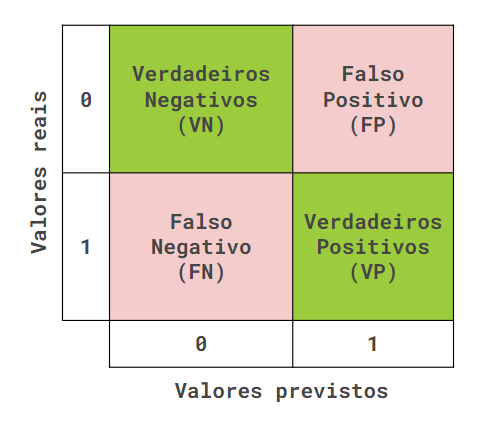

#### Acurácia


É a métrica mais comum e básica em problemas de classificação. É utilizada para medir a proporção de dados previstos corretamente pelo modelo em relação ao total dos dados. Essa métrica é útil quando as classes da variável alvo estão balanceadas, ou seja, quando existe uma quantidade equilibrada de dados para cada classe e uma importância equivalente de classificação entre as categorias. Como exemplo de utilização, temos o reconhecimento de dígitos manuscritos. Podemos utilizar imagens de caracteres de letras e números para treinar um modelo de classificação para identificar corretamente a escrita. Como cada letra ou número não tem uma importância maior do que as demais, a acurácia se torna uma boa métrica para medir a capacidade do modelo em classificar corretamente os dígitos.

Abaixo, podemos analisar o cálculo da acurácia a partir da matriz de confusão. Ela é calculada somando os acertos do modelo (VN + VP) e dividindo por todos os acertos e erros (VP+VN+FP+FN).

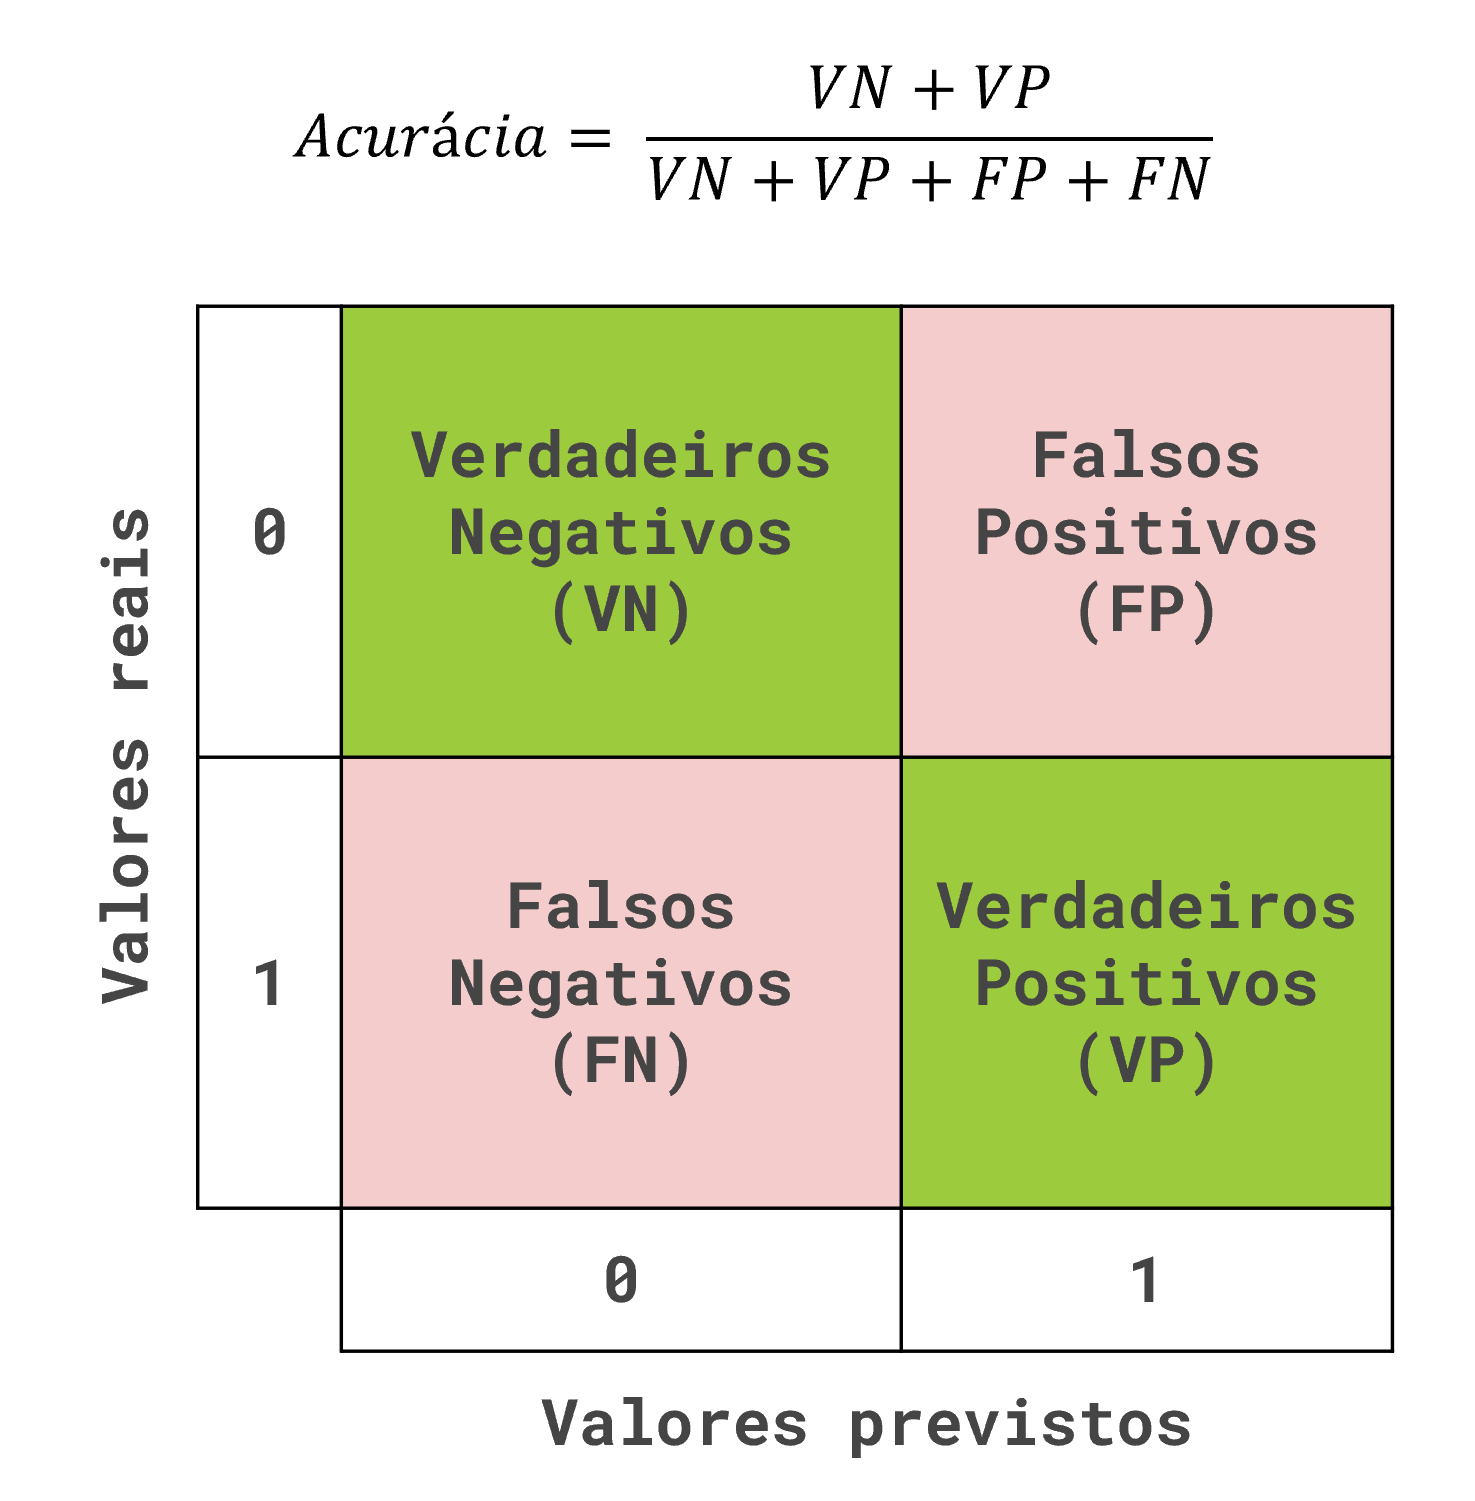

##Revocação (recall)
Mede a proporção de dados positivos que foram corretamente identificados pelo modelo, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados positivos como negativos. É usada quando o risco ou custo de classificar falsos negativos é alto. Por exemplo, em casos de diagnóstico de doenças graves, em que é fundamental detectar corretamente a presença da doença.

Abaixo podemos constatar o cálculo do recall a partir da matriz de confusão. O recall só leva em consideração os valores positivos reais, ou seja, os valores da segunda linha da matriz. Ele é calculado a partir da divisão entre Verdadeiros Positivos (VP) pela soma de todos os positivos reais (VP + FN):

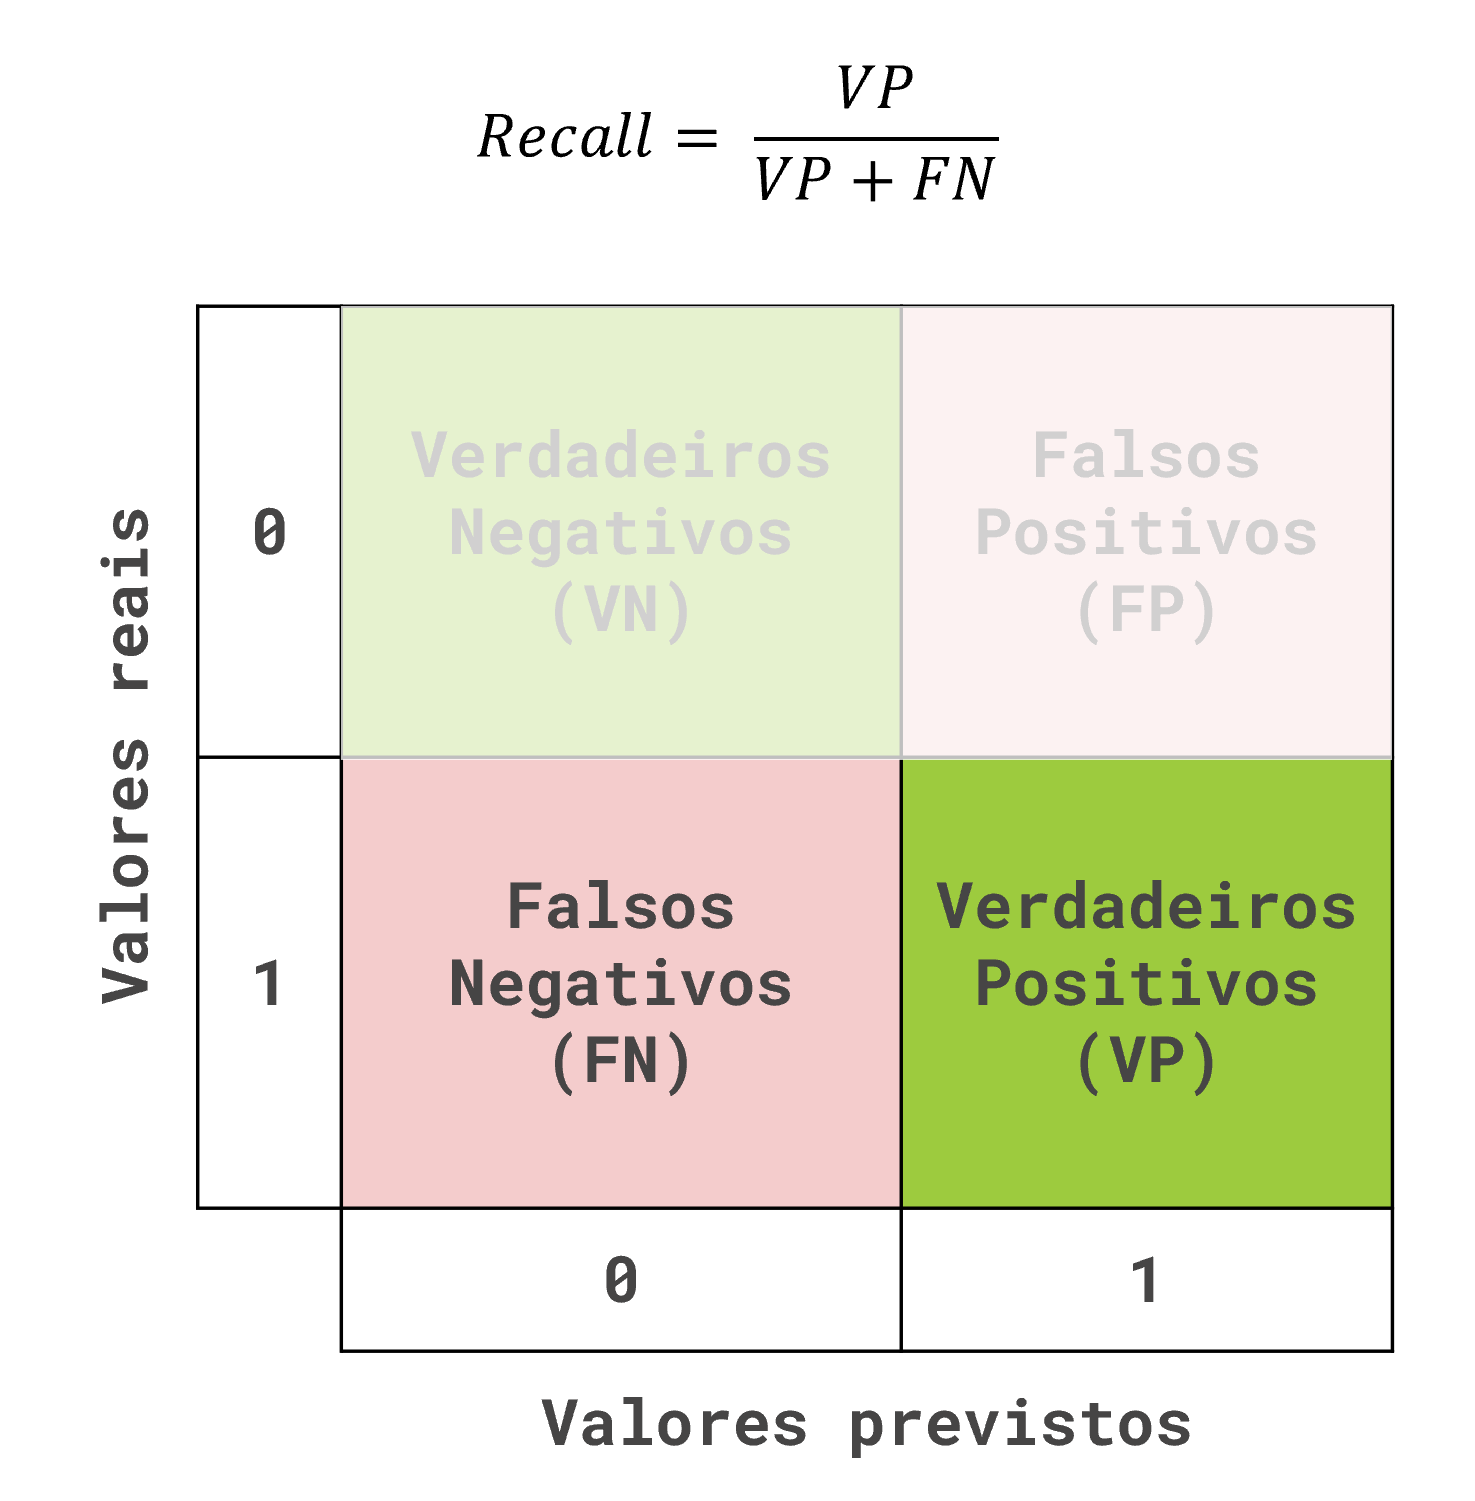




#### Precisão


Mede a proporção de dados classificados como positivos que são realmente positivos, ou seja, revela a capacidade do modelo em evitar a classificação incorreta de dados negativos como positivos. É usada quando o risco ou custo de classificar falsos positivos é alto, por exemplo em casos de seleção de ações no mercado financeiro, onde o importante é selecionar ações que tenham grande probabilidade de retorno, abaixando a quantidade de ações ruins (falsos positivos) mesmo que outras boas ações não tenham sido detectadas pelo modelo (falso negativo). A precisão também é importante no exemplo de detecção de doenças, onde queremos evitar que pacientes saudáveis sejam erroneamente classificados como doentes.

Abaixo podemos analisar o cálculo da precisão a partir da matriz de confusão. A precisão só leva em consideração os valores positivos previstos pelo modelo, ou seja, os valores da segunda coluna da matriz. Ela é calculada a partir da divisão entre Verdadeiros Positivos (VP) pela soma de todos os positivos previstos (VP + FP):

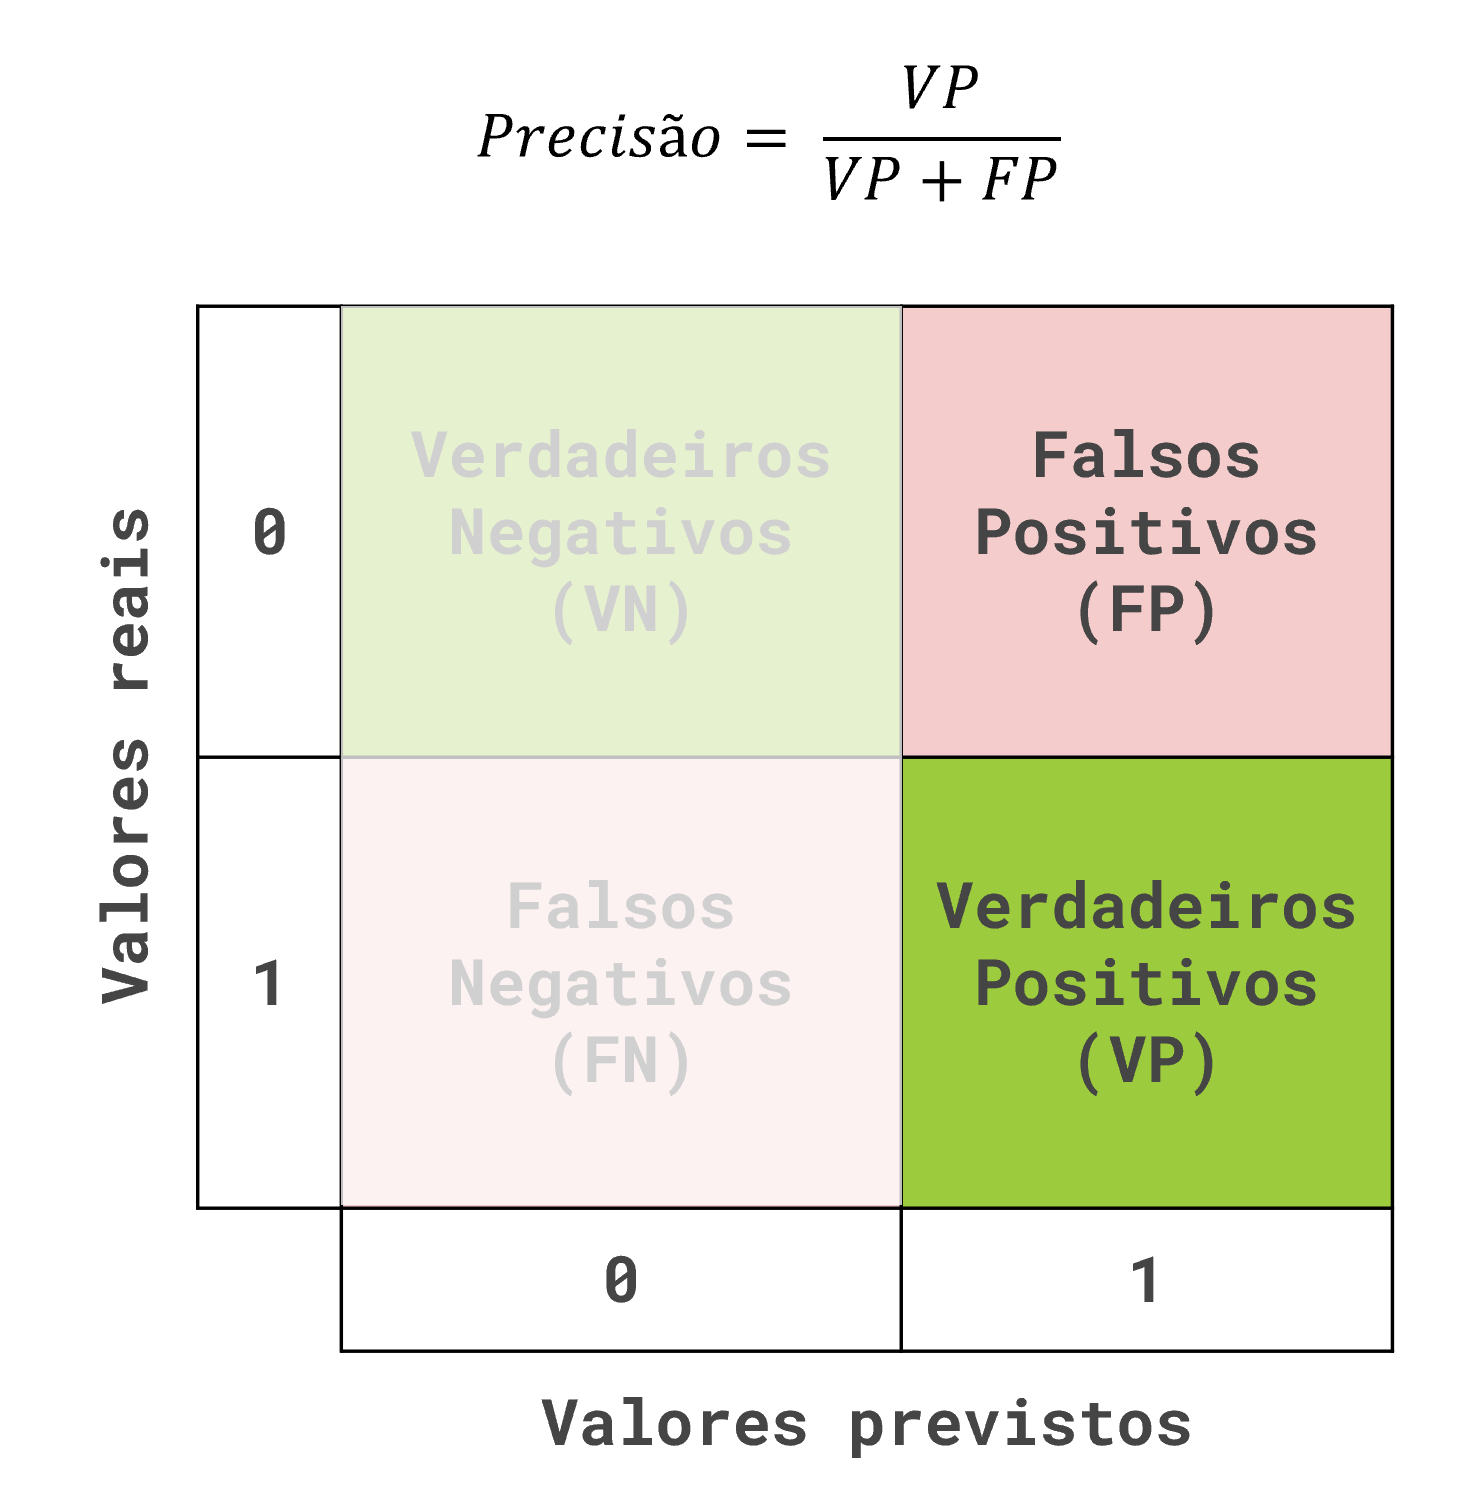

#### F1-Score


Fornece um equilíbrio entre o recall e a precisão, sendo útil quando as classes da variável alvo estão desbalanceadas, ou seja, quando há uma quantidade de dados muito diferente para cada classe. Além disso, é aplicável quando o risco ou custo de falsos positivos e de falsos negativos é alto simultaneamente. Em casos de detecção de tumores em pacientes, é preciso ter um equilíbrio entre evitar erros na detecção de tumores quando a pessoa realmente os possui e evitar erros ao informar que uma pessoa possui um tumor quando na realidade ela não possui.

O cálculo do F1-Score é feito a partir da média harmônica entre a precisão e o recall. Portanto, equivale a 2 vezes a precisão pelo recall, dividido pela soma entre a precisão e o recall:

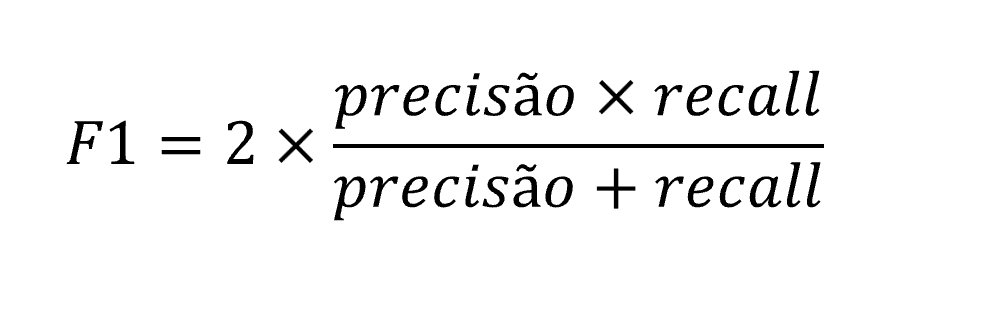

A escolha da métrica de classificação adequada depende do problema que está sendo resolvido e de cada cenário. Nos casos em que as classes estão balanceadas e possuem importância semelhante, a acurácia pode ser uma boa métrica inicial. Porém, quando as classes estão desequilibradas ou os erros têm custos diferentes, métricas como precisão, recall e f1-score são mais indicadas.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("Acurácia:", accuracy_score(y_val, y_pred))
print("Precisão:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))

Acurácia: 0.9095659747423429
Precisão: 0.3333333333333333
Recall: 0.036605657237936774


### Curva ROC

In [ ]:
from sklearn.metrics import RocCurveDisplay

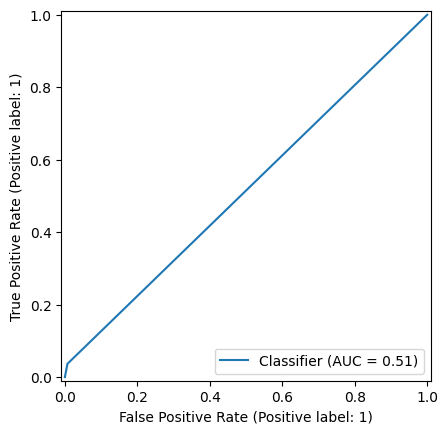

In [ ]:
RocCurveDisplay.from_predictions(y_val, y_pred)

### Curva de precisão x recall

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

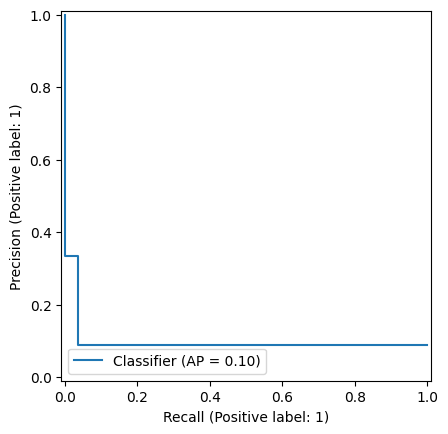

In [ ]:
PrecisionRecallDisplay.from_predictions(y_val, y_pred)

### Relatório de métricas

In [ ]:
print(f"Acuracia: {accuracy_score(y_val, y_pred)}")
print(f"Precisão: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1 Score: {f1_score(y_val, y_pred)}")

Acuracia: 0.9095659747423429
Precisão: 0.3333333333333333
Recall: 0.036605657237936774
F1 Score: 0.06596701649175413


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6288
           1       0.33      0.04      0.07       601

    accuracy                           0.91      6889
   macro avg       0.62      0.51      0.51      6889
weighted avg       0.86      0.91      0.88      6889



## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a avaliação de desempenho será feita tirando a média da métrica de cada modelo. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

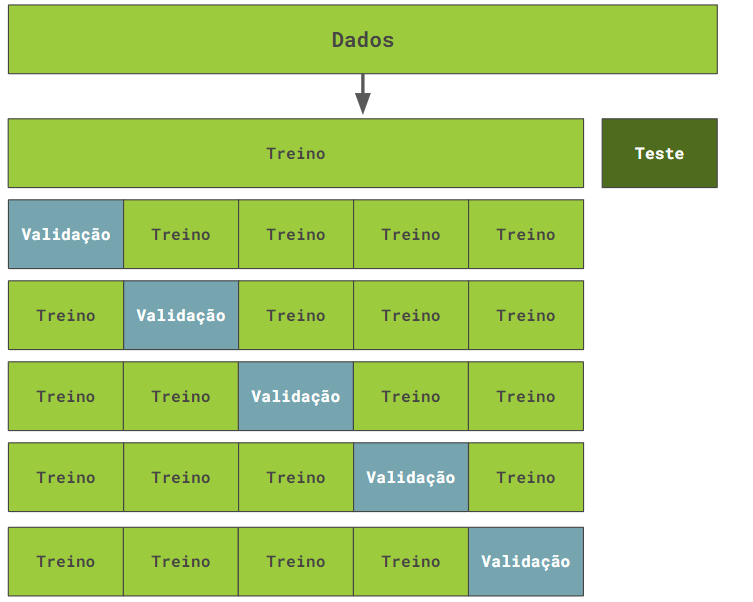

In [ ]:
from sklearn.model_selection import cross_validate, KFold

In [ ]:
modelo = DecisionTreeClassifier(max_depth=PROFUNDIDADE,
                                random_state=SEED)

kf = KFold(n_splits=5,
           shuffle=True,
           random_state=SEED)
cv = cross_validate(modelo,
                    x_treino,
                    y_treino,
                    cv=kf,
                    scoring=['accuracy', 'recall', 'precision', 'f1'])

tcv = pd.DataFrame(cv)
tcv.mean()


,0
fit_time,0.286488
score_time,0.014591
test_accuracy,0.907254
test_recall,0.024980
test_precision,0.223761
test_f1,0.044901


### Validação cruzada com recall

In [ ]:
media = cv["test_accuracy"].mean()
desv_pad = cv["test_accuracy"].std()
print(f"Acurácia: {media:.5f} +- {desv_pad:.5f}")
print(f"Acuracia: {media- 10*desv_pad} - {media + 10*desv_pad}")

Acurácia: 0.90725 +- 0.00227
Acuracia: 0.8845897500618219 - 0.9299177363906771


### Estratificando os dados

In [ ]:
from sklearn.model_selection import StratifiedKFold
modelo = DecisionTreeClassifier(max_depth=PROFUNDIDADE,
                                random_state=SEED)

kf = StratifiedKFold(n_splits=5,
           shuffle=True,
           random_state=SEED)
scv = cross_validate(modelo, x_treino, y_treino, cv=kf, scoring=['accuracy',
                                                                'recall',
                                                                'precision',
                                                                'f1'])

scv

{'fit_time': array([0.29061556, 0.3166182 , 0.28761411, 0.39226151, 0.41444516]),
 'score_time': array([0.01562405, 0.01437044, 0.02439642, 0.0252068 , 0.02017117]),
 'test_accuracy': array([0.90756668, 0.90995209, 0.90581446, 0.90483449, 0.90984321]),
 'test_recall': array([0.04862843, 0.0349563 , 0.02119701, 0.02743142, 0.01870324]),
 'test_precision': array([0.312     , 0.34146341, 0.17525773, 0.18965517, 0.26785714]),
 'test_f1': array([0.08414239, 0.06342016, 0.0378198 , 0.04793028, 0.03496503])}

In [ ]:
media = scv["test_recall"].mean()
desv_pad = scv["test_recall"].std()
print(f"Recall: {media:.5f} +- {desv_pad:.5f}")
#print(f"Recall: {media- 10*desv_pad} - {media + 10*desv_pad}")

Recall: 0.03018 +- 0.01080


# Resumo Modelo + Validação

In [ ]:
def media_desvio(metrica,scv):
  media = scv[metrica].mean()
  desv_pad = scv[metrica].std()
  print(f"{metrica}: {media:.5f} +- {desv_pad:.5f}")
  print(f"{metrica}: {media- 10*desv_pad} - {media + 10*desv_pad}")

In [ ]:
#separação entre features (x) e target (y)


x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

#separação treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,
                                                        test_size = 0.15,
                                                        stratify = y,
                                                        random_state = SEED)

#treino + validação

modelo = DecisionTreeClassifier(max_depth=PROFUNDIDADE,
                                random_state=SEED)

skf = StratifiedKFold(n_splits = 5,
                      shuffle = True,
                      random_state
                      = SEED)
skf = cross_validate(modelo, x_treino, y_treino, cv=skf, scoring=['accuracy',
                                                                'recall',
                                                                'precision',
                                                                'f1'])
# Decision Tree Metricas
media_desvio("test_accuracy",skf)
media_desvio("test_recall",skf)
media_desvio("test_precision",skf)
media_desvio("test_f1",skf)



test_accuracy: 0.90760 +- 0.00207
test_accuracy: 0.8869132722845305 - 0.928291101988779
test_recall: 0.03018 +- 0.01080
test_recall: -0.07780953158554596 - 0.1381760933334857
test_precision: 0.25725 +- 0.06556
test_precision: -0.39840208348497047 - 0.9128954682305086
test_f1: 0.05366 +- 0.01821
test_f1: -0.1284257829711451 - 0.23573685150689278


In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100,
                                random_state=SEED, max_depth = PROFUNDIDADE)

skf = StratifiedKFold(n_splits = 5,
                      shuffle = True,
                      random_state
                      = SEED)

rfc = cross_validate(modelo, x_treino, y_treino, cv=skf, scoring=['accuracy',
                                                                'recall',
                                                                'precision',
                                                                'f1'])

media_desvio("test_accuracy",rfc)
media_desvio("test_recall",rfc)
media_desvio("test_precision",rfc)
media_desvio("test_f1",rfc )





test_accuracy: 0.91270 +- 0.00013
test_accuracy: 0.9114472545409525 - 0.9139485392373446
test_recall: 0.00125 +- 0.00079
test_recall: -0.006638787536082347 - 0.009133175785184933
test_precision: 0.58000 +- 0.38158
test_precision: -3.2357568056677826 - 4.395756805667783
test_f1: 0.00249 +- 0.00157
test_f1: -0.013188644257527783 - 0.01816009117430447


In [ ]:
# Fzr com KNG
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=SEED)

knn_scores = cross_validate(modelo_knn, x_treino, y_treino, cv=skf,
                            scoring=['accuracy',
                                     'recall',
                                     'precision',
                                     'f1'])



media_desvio("test_accuracy",knn_scores)
media_desvio("test_recall",knn_scores)
media_desvio("test_precision",knn_scores)
media_desvio("test_f1",knn_scores )



test_accuracy: 0.90630 +- 0.00078
test_accuracy: 0.8984702474128934 - 0.9141209148934728
test_recall: 0.01247 +- 0.00284
test_recall: -0.015940174593865833 - 0.040882811758756354
test_precision: 0.12614 +- 0.02055
test_precision: -0.07938824213498999 - 0.33167258584790515
test_f1: 0.02267 +- 0.00497
test_f1: -0.027007147320577695 - 0.07234678149264238


<h1>Otimização </h1>

<h2>Balanceamento </h2>

<h3>Oversampling</h3>

In [ ]:
def media_desvio(metrica):
  media = scv[metrica].mean()
  devio_padrao = round(scv[metrica].std(),4)
  # print(f"{metrica}: {media} +- {devio_padrao}")
  print(f"{metrica} média: {round(media - 2*devio_padrao,3)} -{round(media + 2*devio_padrao,3)}")


In [ ]:
#!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE # Cria dados para os dados minoritários utilizando o metodo knn
from sklearn.model_selection import train_test_split


In [ ]:
x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente'] #70% - 0  30% - 1
SEED = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y,
                                                        test_size = 0.15,
                                                        random_state = SEED,
                                                        stratify = y)

In [ ]:
#O balanceamento é realizado somente nos dados de treinamento
sm = SMOTE(random_state=SEED)

x_balanceado, y_balanceado = sm.fit_resample(x_treino,
                                             y_treino)


In [ ]:
y_balanceado.value_counts()

,count
inadimplente,
0,41912
1,41912


In [ ]:
# DecisionTree Balanceado
modelo_dtc_bal = DecisionTreeClassifier(max_depth=10,
                                        random_state = 123)

#Crossvalidate
skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=123)

dtc_scores_bal = cross_validate(modelo_dtc_bal, x_balanceado, y_balanceado, cv=skf,
                            scoring=['accuracy',
                                     'recall',
                                     'precision',
                                     'f1'])

In [ ]:
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1" )

test_accuracy média: 0.903 -0.912
test_recall média: 0.009 -0.052
test_precision média: 0.126 -0.388
test_f1 média: 0.017 -0.09


In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)

sm = SMOTE(random_state=seed)
x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
y_balanceado.value_counts()

modelo = DecisionTreeClassifier(max_depth=10, random_state=seed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring=["recall","precision","accuracy","f1"])

media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")



test_accuracy média: 0.781 -0.783
test_recall média: 0.709 -0.737
test_precision média: 0.812 -0.828
test_f1 média: 0.764 -0.773


###Balanceamento e Validação Pipeline ImbalancedLearn

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)

#Pipeline - Balanceamento e Validação
sm = SMOTE(random_state=seed) #OVERSAMPLING
modelo = DecisionTreeClassifier(max_depth=10, random_state=seed)

pipeline = imbpipeline(steps=[('smote', sm), ('modelo', modelo)]) # processo q balanceia e depois treina


#x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
#y_balanceado.value_counts()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline,
                     x_treino,
                     y_treino,
                     cv=skf,
                     scoring=["recall","precision","accuracy","f1"])

DT_OVERSAMPLING = np.mean(scv["test_recall"])

In [ ]:
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")


test_accuracy média: 0.755 -0.807
test_recall média: 0.188 -0.268
test_precision média: 0.101 -0.131
test_f1 média: 0.136 -0.172


### Undersampling

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123
nm = NearMiss()# UNDERSAMPLING
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)

#Pipeline - Balanceamento e Validação
modelo = DecisionTreeClassifier(max_depth=10, random_state=seed)

pipeline = imbpipeline(steps=[('nearmiss', nm), ('modelo', modelo)]) # processo q balanceia e depois treina




skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline,
                     x_treino,
                     y_treino,
                     cv=skf,
                     scoring=["recall","precision","accuracy","f1"])

DT_NM = np.mean(scv["test_recall"])


In [ ]:
media_desvio("test_accuracy")
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

test_accuracy média: 0.26 -0.291
test_recall média: 0.735 -0.801
test_precision média: 0.084 -0.09
test_f1 média: 0.15 -0.162


In [ ]:
#treinar o modelo
x_balanceado, y_balanceado = nm.fit_resample(x_treino, y_treino)
y_balanceado.value_counts()

modelo_final = modelo.fit(x_balanceado, y_balanceado)

In [ ]:
modelo_final

DecisionTreeClassifier(max_depth=10, random_state=123)

In [ ]:
#Teste do modelo final - (Dados de teste)
modelo_final.score(x_teste, y_teste)
# y_pred  = modelo.predict(x_balanceado) # This line was causing the error
y_pred  = modelo_final.predict(x_teste) # Predict on the test features

# Randomforest, KNN, Regressão logistica
# balanceamento, smote, nearmiss, SmoteEE

print(f'Acuracia: {accuracy_score(y_teste, y_pred)}')
print(f'Precisao: {precision_score(y_teste, y_pred)}')
print(f'Recall: {recall_score(y_teste, y_pred)}')
print(f'F1-Score: {f1_score(y_teste, y_pred)}')

Acuracia: 0.27381539980256664
Precisao: 0.08760751831793565
Recall: 0.7779349363507779
F1-Score: 0.15748031496062992


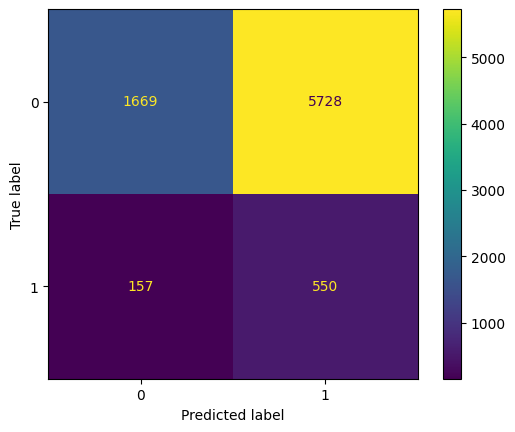

In [ ]:
dtc_conf_mat = ConfusionMatrixDisplay(confusion_matrix(y_teste, y_pred)).plot()
dtc_conf_mat

In [ ]:

# Randomforest, KNN, Regressão logistica
# balanceamento, smote, nearmiss, SmoteEE

metodos_columns = ['KNN', 'RL', 'RandomForest']
metodos_rows = ['Smote', 'NearMiss','Smoteenn']

df_metodos = pd.DataFrame(columns=metodos_columns, index=metodos_rows)
df_metodos

,KNN,RL,RandomForest
Smote,NaN,NaN,NaN
NearMiss,NaN,NaN,NaN
Smoteenn,NaN,NaN,NaN


# KNN

##Knn com oversampling

In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)

sm = SMOTE(random_state=seed) #OVERSAMPLING

modelo_knn = KNeighborsClassifier()

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=SEED)
pipeline = imbpipeline(steps=[('smote', sm), ('modelo', modelo_knn)]) # processo q balanceia e depois treina


#x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
#y_balanceado.value_counts()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline,
                     x_treino,
                     y_treino,
                     cv=skf,
                     scoring=["recall","precision","accuracy","f1"])

media_desvio("test_accuracy")
media_desvio("test_recall")
KNN_OVERSAMPLING = np.mean(scv["test_recall"])
media_desvio("test_precision")
media_desvio("test_f1")



test_accuracy média: 0.67 -0.682
test_recall média: 0.306 -0.397
test_precision média: 0.091 -0.115
test_f1 média: 0.14 -0.178


##KNN NearMiss

In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)
nm = NearMiss()# UNDERSAMPLING


modelo_knn = KNeighborsClassifier()

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=SEED)
pipeline = imbpipeline(steps=[('nearmiss', nm), ('modelo', modelo_knn)]) # processo q balanceia e depois treina


#x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
#y_balanceado.value_counts()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline,
                     x_treino,
                     y_treino,
                     cv=skf,
                     scoring=["recall","precision","accuracy","f1"])


In [ ]:
media_desvio("test_accuracy")
KNN_NEARMISS = np.mean(scv["test_recall"])
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")

test_accuracy média: 0.227 -0.256
test_recall média: 0.749 -0.807
test_precision média: 0.081 -0.087
test_f1 média: 0.147 -0.157


##KNN SmoteENN


In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)

sme = SMOTEENN(random_state=seed) #Over-sampling using SMOTE and cleaning using ENN.
modelo_knn = KNeighborsClassifier()

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=SEED)
pipeline = imbpipeline(steps=[('smoteen', sme), ('modelo', modelo_knn)]) # processo q balanceia e depois treina


#x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
#y_balanceado.value_counts()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline,
                     x_treino,
                     y_treino,
                     cv=skf,
                     scoring=["recall","precision","accuracy","f1"])

media_desvio("test_accuracy")
KNN_SMOTEENN= np.mean(scv["test_recall"])
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")



test_accuracy média: 0.607 -0.622
test_recall média: 0.391 -0.443
test_precision média: 0.092 -0.104
test_f1 média: 0.15 -0.168


In [ ]:
KNN_TESTES = [KNN_OVERSAMPLING,KNN_NEARMISS,KNN_SMOTEENN]

## Decision Tree SMOTEENN


In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)

sme = SMOTEENN(random_state=seed)
modelo = DecisionTreeClassifier(max_depth=10, random_state=seed)
pipeline = imbpipeline(steps=[('smoteen', sme), ('modelo', modelo)]) # processo q balanceia e depois treina


x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
y_balanceado.value_counts()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline, x_balanceado, y_balanceado, cv=skf, scoring=["recall","precision","accuracy","f1"])

media_desvio("test_accuracy")
DT_SMOTTEN= np.mean(scv["test_recall"])
media_desvio("test_recall")
media_desvio("test_precision")
media_desvio("test_f1")



test_accuracy média: 0.745 -0.765
test_recall média: 0.723 -0.8
test_precision média: 0.726 -0.779
test_f1 média: 0.747 -0.766


In [ ]:
DT_TESTES = [DT_OVERSAMPLING,DT_NM,DT_SMOTTEN]

#RandomForest
## SMOTE

In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)

sm = SMOTE(random_state=seed) #OVERSAMPLING

modelo_randomforest = RandomForestClassifier(n_estimators=100,
                                random_state=seed, max_depth = PROFUNDIDADE)

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=SEED)
pipeline = imbpipeline(steps=[('smote', sm), ('modelo', modelo_randomforest)]) # processo q balanceia e depois treina


#x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
#y_balanceado.value_counts()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline,
                     x_treino,
                     y_treino,
                     cv=skf,
                     scoring=["recall","precision","accuracy","f1"])

media_desvio("test_accuracy")
media_desvio("test_recall")
RNF_OVERSAMPLING= np.mean(scv["test_recall"])
media_desvio("test_precision")
media_desvio("test_f1")



test_accuracy média: 0.782 -0.794
test_recall média: 0.228 -0.248
test_precision média: 0.117 -0.133
test_f1 média: 0.155 -0.173


##NEARMISS

In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)

nm = NearMiss() #OVERSAMPLING

modelo_randomforest = RandomForestClassifier(n_estimators=100,
                                random_state=seed, max_depth = PROFUNDIDADE)

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=SEED)
pipeline = imbpipeline(steps=[('nearmiss', nm), ('modelo', modelo_randomforest)]) # processo q balanceia e depois treina


#x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
#y_balanceado.value_counts()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline,
                     x_treino,
                     y_treino,
                     cv=skf,
                     scoring=["recall","precision","accuracy","f1"])

media_desvio("test_accuracy")
media_desvio("test_recall")
RNF_NEARMISS= np.mean(scv["test_recall"])
media_desvio("test_precision")
media_desvio("test_f1")



test_accuracy média: 0.255 -0.28
test_recall média: 0.767 -0.799
test_precision média: 0.085 -0.09
test_f1 média: 0.153 -0.162


## SMOTEENN

In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123

x_treino, x_test, y_treino, y_test = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)


sme = SMOTEENN(random_state=seed)
modelo_randomforest = RandomForestClassifier(n_estimators=100,
                                random_state=seed, max_depth = PROFUNDIDADE)

skf = StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=SEED)
pipeline = imbpipeline(steps=[('smoteenn', sme), ('modelo', modelo_randomforest)]) # processo q balanceia e depois treina


#x_balanceado, y_balanceado = sm.fit_resample(x_treino, y_treino)
#y_balanceado.value_counts()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline,
                     x_treino,
                     y_treino,
                     cv=skf,
                     scoring=["recall","precision","accuracy","f1"])

media_desvio("test_accuracy")
media_desvio("test_recall")
RNF_SMOTEENN= np.mean(scv["test_recall"])
media_desvio("test_precision")
media_desvio("test_f1")



test_accuracy média: 0.731 -0.761
test_recall média: 0.319 -0.399
test_precision média: 0.125 -0.148
test_f1 média: 0.181 -0.214


##Logistic Regression
###Smote

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)

lr_modelo = LogisticRegression(random_state=seed,max_iter=1000)

sm = SMOTE(random_state=seed) #OVERSAMPLING
scaler = StandardScaler()

pipeline_com_scaler = imbpipeline(steps=[
    ('scaler', scaler),      # 1. Escalar os dados
    ('smote', sm),           # 2. Aplicar SMOTE aos dados escalados
    ('modelo', lr_modelo)    # 3. Treinar o modelo
])


#Pipeline - Balanceamento e Validação
#pipeline = imbpipeline(steps=[('smote', sm), ('modelo', lr_modelo)]) # processo q balanceia e depois treina

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline_com_scaler,
                     x_treino,
                     y_treino,
                     cv=skf,
                     scoring=["recall","precision","accuracy","f1"])

media_desvio("test_accuracy")
media_desvio("test_recall")
LR_SMOTE = np.mean(scv["test_recall"])
media_desvio("test_precision")
media_desvio("test_f1")



test_accuracy média: 0.65 -0.664
test_recall média: 0.57 -0.612
test_precision média: 0.141 -0.146
test_f1 média: 0.226 -0.236


### NearMiss

In [ ]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']
seed = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y,
test_size=0.15, stratify=y, random_state=seed)

lr_modelo = LogisticRegression(random_state=seed)

nm = NearMiss() #UNDERSAMPLING
scaler = StandardScaler()
pipeline_com_scaler = imbpipeline(steps=[
    ('scaler', scaler),      # 1. Escalar os dados
    ('nearmiss', nm),           # 2. Aplicar SMOTE aos dados escalados
    ('modelo', lr_modelo)    # 3. Treinar o modelo
])

#Pipeline - Balanceamento e Validação
#pipeline = imbpipeline(steps=[('nearmiss', nm), ('modelo', lr_modelo)]) # processo q balanceia e depois treina

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline_com_scaler,
                     x_treino,
                     y_treino,
                     cv=skf,
                     scoring=["recall","precision","accuracy","f1"])

media_desvio("test_accuracy")
media_desvio("test_recall")
LR_NEARMISS = np.mean(scv["test_recall"])
media_desvio("test_precision")
media_desvio("test_f1")



test_accuracy média: 0.449 -0.479
test_recall média: 0.624 -0.683
test_precision média: 0.097 -0.106
test_f1 média: 0.168 -0.183


###SMOTEENN

In [ ]:
stm = SMOTEENN(random_state=seed)
scaler = StandardScaler()
pipeline_com_scaler = imbpipeline(steps=[
    ('scaler', scaler),      # 1. Escalar os dados
    ('smoteenn', stm),           # 2. Aplicar SMOTE aos dados escalados
    ('modelo', lr_modelo)    # 3. Treinar o modelo
])

#Pipeline - Balanceamento e Validação
#pipeline = imbpipeline(steps=[('nearmiss', nm), ('modelo', lr_modelo)]) # processo q balanceia e depois treina

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scv = cross_validate(pipeline_com_scaler,
                     x_treino,
                     y_treino,
                     cv=skf,
                     scoring=["recall","precision","accuracy","f1"])

media_desvio("test_accuracy")
media_desvio("test_recall")
LR_SMOTEENN = np.mean(scv["test_recall"])
media_desvio("test_precision")
media_desvio("test_f1")



test_accuracy média: 0.486 -0.503
test_recall média: 0.742 -0.779
test_precision média: 0.118 -0.124
test_f1 média: 0.203 -0.213


##DecisionTreeSeparado (mo trampo mexer laaaa em cima)

In [ ]:
# Modelo Decision Tree
dt_modelo = DecisionTreeClassifier(random_state=seed)

# Scaler
scaler = StandardScaler()

# Técnicas de reamostragem
smote_sampler = SMOTE(random_state=seed)
smoteenn_sampler = SMOTEENN(random_state=seed)
nearmiss_sampler = NearMiss() # Considerar NearMiss(version=1) ou outra se preferir

# Validação Cruzada Estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scoring_metrics = ["recall", "precision", "accuracy", "f1"]

# Dicionários para guardar resultados para facilitar a impressão
dt_results_storage = {}

# --- 1. Decision Tree com SMOTE (DT_SMOTE) ---
print("Avaliando: Decision Tree com SMOTE")
pipeline_dt_smote = imbpipeline(steps=[
    ('scaler', scaler),
    ('smote', smote_sampler),
    ('modelo', dt_modelo)
])

cv_results_dt_smote = cross_validate(pipeline_dt_smote,
                                     x_treino,
                                     y_treino,
                                     cv=skf,
                                     n_jobs=-1,
                                     scoring=scoring_metrics)

print("Resultados para Decision Tree com SMOTE:")

for metric in scoring_metrics:
    mean_val = np.mean(cv_results_dt_smote[f"test_{metric}"])
    std_val = np.std(cv_results_dt_smote[f"test_{metric}"])
    print(f"  Média test_{metric}: {mean_val:.4f} (DP: {std_val:.4f})")
DT_SMOTE = np.mean(cv_results_dt_smote["test_recall"])
dt_results_storage["DT_SMOTE"] = DT_SMOTE
print("-" * 50)


# --- 2. Decision Tree com SMOTEENN (DT_SMOTEENN) ---
print("\nAvaliando: Decision Tree com SMOTEENN")
pipeline_dt_smoteenn = imbpipeline(steps=[
    ('scaler', scaler),
    ('smoteenn', smoteenn_sampler),
    ('modelo', dt_modelo)
])

cv_results_dt_smoteenn = cross_validate(pipeline_dt_smoteenn,
                                        x_treino,
                                        y_treino,
                                        cv=skf,
                                        n_jobs=-1,
                                        scoring=scoring_metrics)

print("Resultados para Decision Tree com SMOTEENN:")
for metric in scoring_metrics:
    mean_val = np.mean(cv_results_dt_smoteenn[f"test_{metric}"])
    std_val = np.std(cv_results_dt_smoteenn[f"test_{metric}"])
    print(f"  Média test_{metric}: {mean_val:.4f} (DP: {std_val:.4f})")
DT_SMOTEENN = np.mean(cv_results_dt_smoteenn["test_recall"])
dt_results_storage["DT_SMOTEENN"] = DT_SMOTEENN
print("-" * 50)


# --- 3. Decision Tree com NearMiss (DT_NEARMISS) ---
print("\nAvaliando: Decision Tree com NearMiss")
pipeline_dt_nearmiss = imbpipeline(steps=[
    ('scaler', scaler),
    ('nearmiss', nearmiss_sampler), # Corrigido para usar a instância correta
    ('modelo', dt_modelo)
])

cv_results_dt_nearmiss = cross_validate(pipeline_dt_nearmiss,
                                        x_treino,
                                        y_treino,
                                        cv=skf,
                                        n_jobs=-1,
                                        scoring=scoring_metrics)

print("Resultados para Decision Tree com NearMiss:")
for metric in scoring_metrics:
    mean_val = np.mean(cv_results_dt_nearmiss[f"test_{metric}"])
    std_val = np.std(cv_results_dt_nearmiss[f"test_{metric}"])
    print(f"  Média test_{metric}: {mean_val:.4f} (DP: {std_val:.4f})")
DT_NEARMISS = np.mean(cv_results_dt_nearmiss["test_recall"])
dt_results_storage["DT_NEARMISS"] = DT_NEARMISS
print("-" * 50)


# --- Resumo Final dos Recalls ---
print("\nResumo dos Scores de RECALL Médio (Decision Tree):")
print(f"DT_SMOTE Recall:    {DT_SMOTE:.4f}")
print(f"DT_SMOTEENN Recall: {DT_SMOTEENN:.4f}")
print(f"DT_NEARMISS Recall: {DT_NEARMISS:.4f}")

Avaliando: Decision Tree com SMOTE
Resultados para Decision Tree com SMOTE:
  Média test_recall: 0.2619 (DP: 0.0056)
  Média test_precision: 0.1279 (DP: 0.0044)
  Média test_accuracy: 0.7795 (DP: 0.0060)
  Média test_f1: 0.1719 (DP: 0.0045)
--------------------------------------------------

Avaliando: Decision Tree com SMOTEENN
Resultados para Decision Tree com SMOTEENN:
  Média test_recall: 0.3934 (DP: 0.0178)
  Média test_precision: 0.1264 (DP: 0.0061)
  Média test_accuracy: 0.7094 (DP: 0.0083)
  Média test_f1: 0.1912 (DP: 0.0088)
--------------------------------------------------

Avaliando: Decision Tree com NearMiss
Resultados para Decision Tree com NearMiss:
  Média test_recall: 0.8129 (DP: 0.0099)
  Média test_precision: 0.0859 (DP: 0.0010)
  Média test_accuracy: 0.2284 (DP: 0.0033)
  Média test_f1: 0.1554 (DP: 0.0018)
--------------------------------------------------

Resumo dos Scores de RECALL Médio (Decision Tree):
DT_SMOTE Recall:    0.2619
DT_SMOTEENN Recall: 0.3934
DT_N

#Resultados

In [ ]:
dic_resultados = {
    "KNN": [ KNN_OVERSAMPLING, KNN_NEARMISS, KNN_SMOTEENN],
    "DT": [DT_SMOTE, DT_NEARMISS, DT_SMOTEENN],
    "RNF": [RNF_OVERSAMPLING, RNF_NEARMISS, RNF_SMOTEENN],
    "LR": [LR_SMOTE, LR_NEARMISS, LR_SMOTEENN]
}


df_resultados = pd.DataFrame(dic_resultados, index=["SMOTE", "NEARMISS", "SMOTEENN"])
df_resultados
#

,KNN,DT,RNF,LR
SMOTE,0.351453,0.261913,0.237963,0.590671
NEARMISS,0.778004,0.812921,0.783486,0.653779
SMOTEENN,0.416810,0.393359,0.358942,0.760537


##Comparando com matplotlib

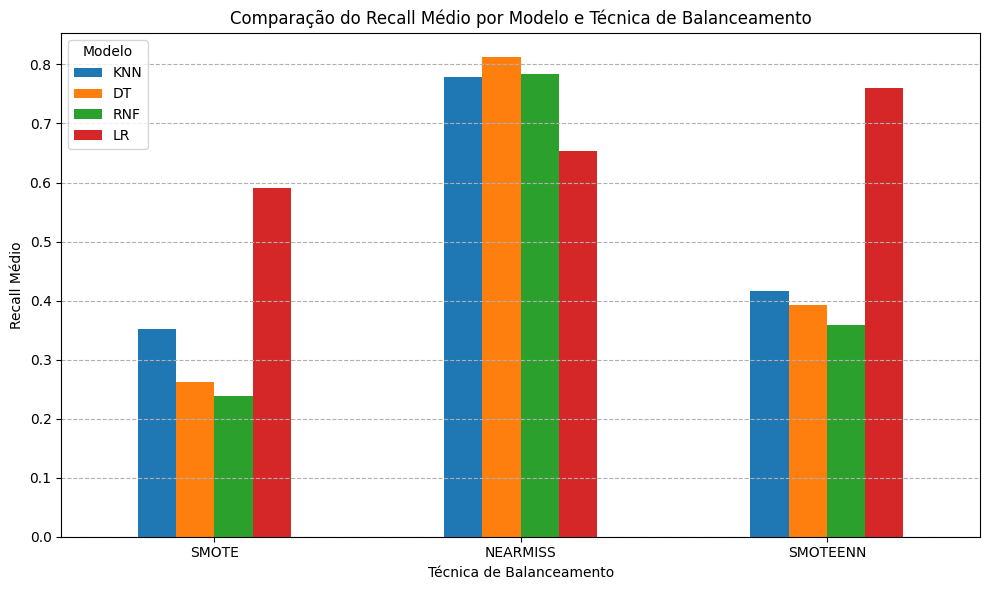

In [ ]:
plt.figure(figsize=(10, 6))
df_resultados.plot(kind='bar', ax=plt.gca())
plt.title('Comparação do Recall Médio por Modelo e Técnica de Balanceamento')
plt.xlabel('Técnica de Balanceamento')
plt.ylabel('Recall Médio')
plt.xticks(rotation=0)
plt.legend(title='Modelo')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


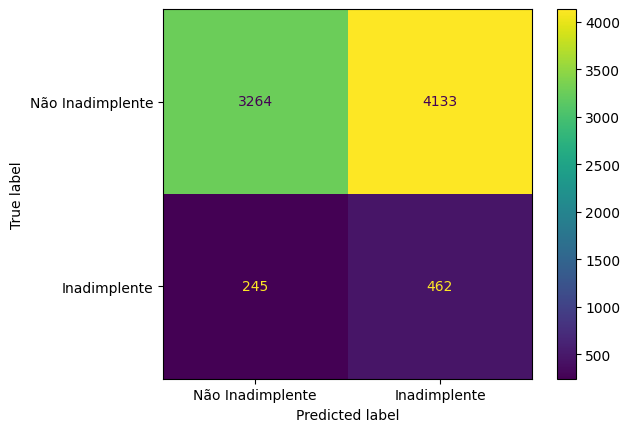

In [ ]:
lr_modelo = LogisticRegression(random_state=seed, max_iter=1000)
nm = NearMiss()
scaler = StandardScaler()
pipeline_nm = imbpipeline(steps=[
    ('scaler', scaler),
    ('nearmiss', nm),
    ('modelo', lr_modelo)
])
pipeline_nm.fit(x_treino, y_treino)

y_pred = pipeline_nm.predict(x_test)

# Plotar a matriz de confusão
lr_nm_conf_mat = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Não Inadimplente', 'Inadimplente']).plot()


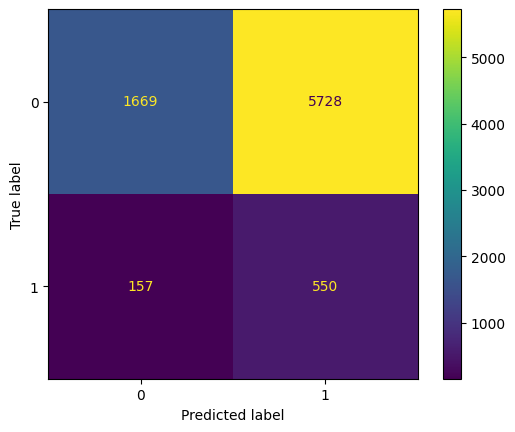

In [ ]:
dtc_conf_mat.plot()